<a href="https://colab.research.google.com/github/Atruk/UAI_HW/blob/master/HW_3_Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт модулей

In [ ]:
from tensorflow.keras.datasets import mnist # база mnist
from tensorflow.keras.datasets import cifar10 # база cifar10
from tensorflow.keras.datasets import cifar100 # база cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils # to_categorical
from tensorflow.keras.preprocessing import image # Отрисовка изображений
import numpy as np
import pandas as pd
import random
import math
import os
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from google.colab import drive
from keras.callbacks import History
from pprint import pprint

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Подготовка данных MNIST

In [ ]:
def prepare_data():
  # загрузка данных
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  # print(x_train.shape)
  # print(y_train.shape)
  # print(x_test.shape)
  # print(y_test.shape)

  # в формат ohe
  y_train = utils.to_categorical(y_train, 10)
  y_test = utils.to_categorical(y_test, 10)

  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

  # print(x_train.shape)
  # print(x_test.shape)
  # print(y_train.shape)
  # print(y_test.shape)

  return x_train, y_train, x_test, y_test




# Light

## 1 вариант

In [ ]:
# Cоздание НС
def create_model_mnist():
  model = Sequential()
  model.add(BatchNormalization(input_shape=(28, 28, 1)))
  model.add(Conv2D(32, 3, padding='same', activation='relu'))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))

  # компиляция сети
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

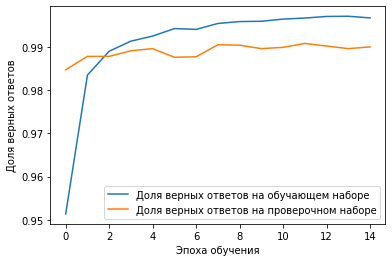

0.9901000261306763


In [ ]:
x_train, y_train, x_test, y_test = prepare_data()
model = create_model_mnist()
print(model.summary())

batch_size = 128

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# График точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

print(history.history['val_accuracy'][-1])

In [ ]:
#Определение цифр из тестовой выборки
# Номер примера 
n = 2565
# Выход сети
prediction = model.predict(x_test)

# Результаты 
print('Выход сети: ', prediction[n])
print('Распознанная цифра: ', np.argmax(prediction[n]))
print('Верный ответ: ', np.argmax(y_test[n]))

Выход сети:  [7.6354726e-18 2.0635989e-14 1.6959184e-16 1.9731762e-17 3.3207145e-15
 1.4865536e-17 7.1244172e-22 1.0000000e+00 3.1477738e-20 6.4666438e-15]
Распознанная цифра:  7
Верный ответ:  7


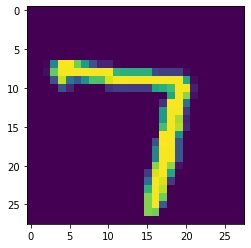

In [ ]:
plt.imshow(x_test[n,:,:,0])

## 2 Вариант

Вариант 2
Провести серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии.
Поменять количество нейронов в сверточных слоях, использовав следующие значения:
один слой 2 фильтров
один слой  4 фильтров
один слой  16 фильтров
Поменять активационную функцию в скрытых слоях с relu на linear
Поменять размеры batch_size:
10
100
Вся база (48000)
Записать в таблицу получившиеся точности.
Написать выводы по результатам проведенных тестов.


**1 пункт:**

In [ ]:
# Функция с количеством нейронов с сверточных слоях:
# один слой 2 фильтра
# один слой 4 фильтра
# один слой 16 фильтров
# Cоздание НС
def create_model_mnist_exp(hidden_size, activation):
  model = Sequential()
  model.add(BatchNormalization(input_shape=(28, 28, 1)))
  if hidden_size == 16:
    model.add(Conv2D(hidden_size / 8, 3, padding='same', activation=activation))
    model.add(Conv2D(hidden_size / 4, (3, 3), padding='same', activation=activation))
    model.add(Conv2D(hidden_size, (3, 3), padding='same', activation=activation))
    print('hidden_size== 16 -->', hidden_size)
  elif hidden_size == 32:
    model.add(Conv2D(hidden_size, 3, padding='same', activation=activation))
    model.add(Conv2D(hidden_size, (3, 3), padding='same', activation=activation))
    print('hidden_size== 32 -->', hidden_size)

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation=activation))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))

  # компиляция сети
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model


------------------------------
START
------------------------------
hidden_size=16
activation=relu
batch_size=128
hidden_size== 16 --> 16
Epoch 1/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2603 - accuracy: 0.9197 - val_loss: 0.0771 - val_accuracy: 0.9757
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0943 - accuracy: 0.9701 - val_loss: 0.0526 - val_accuracy: 0.9822
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0462 - val_accuracy: 0.9845
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.0401 - val_accuracy: 0.9864
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0328 - val_accuracy: 0.9887
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0330 - val_accuracy: 0.9890
Epoch 7/15

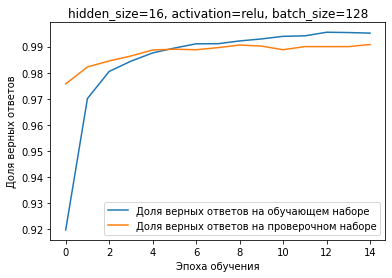

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=16
activation=relu
batch_size=10
hidden_size== 16 --> 16
Epoch 1/15
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1483 - accuracy: 0.9545 - val_loss: 0.0507 - val_accuracy: 0.9835
Epoch 2/15
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0411 - val_accuracy: 0.9865
Epoch 3/15
6000/6000 [==============================] - 36s 6ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0412 - val_accuracy: 0.9878
Epoch 4/15
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 5/15
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0382 - val_accuracy: 0.9874
Epoch 6/15
6000/6000 [==============================] - 35s 6ms/step - 

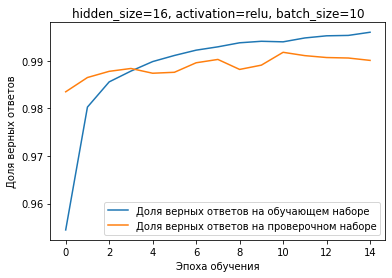

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=16
activation=relu
batch_size=100
hidden_size== 16 --> 16
Epoch 1/15
600/600 [==============================] - 5s 9ms/step - loss: 0.2138 - accuracy: 0.9335 - val_loss: 0.0625 - val_accuracy: 0.9793
Epoch 2/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.0461 - val_accuracy: 0.9844
Epoch 3/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0536 - accuracy: 0.9828 - val_loss: 0.0349 - val_accuracy: 0.9880
Epoch 4/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 5/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0339 - val_accuracy: 0.9886
Epoch 6/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0278 - ac

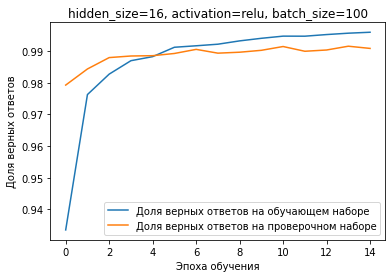

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=16
activation=relu
batch_size=48000
hidden_size== 16 --> 16
Epoch 1/15
2/2 [==============================] - 3s 2s/step - loss: 2.2937 - accuracy: 0.1307 - val_loss: 1.9769 - val_accuracy: 0.3092
Epoch 2/15
2/2 [==============================] - 1s 295ms/step - loss: 2.0799 - accuracy: 0.3679 - val_loss: 1.7240 - val_accuracy: 0.4582
Epoch 3/15
2/2 [==============================] - 1s 582ms/step - loss: 1.8400 - accuracy: 0.5242 - val_loss: 1.5395 - val_accuracy: 0.5053
Epoch 4/15
2/2 [==============================] - 1s 585ms/step - loss: 1.5818 - accuracy: 0.6211 - val_loss: 1.3263 - val_accuracy: 0.5996
Epoch 5/15
2/2 [==============================] - 1s 583ms/step - loss: 1.3386 - accuracy: 0.6787 - val_loss: 1.2141 - val_accuracy: 0.6061
Epoch 6/15
2/2 [==============================] - 1s 583ms/step - loss: 1.1184 - accuracy: 0.715

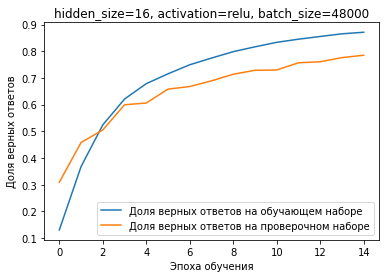

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=16
activation=linear
batch_size=128
hidden_size== 16 --> 16
Epoch 1/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2508 - accuracy: 0.9231 - val_loss: 0.1072 - val_accuracy: 0.9655
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1258 - accuracy: 0.9609 - val_loss: 0.0938 - val_accuracy: 0.9712
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1037 - accuracy: 0.9675 - val_loss: 0.0777 - val_accuracy: 0.9754
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.0783 - val_accuracy: 0.9756
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0858 - accuracy: 0.9734 - val_loss: 0.0737 - val_accuracy: 0.9768
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0805 - 

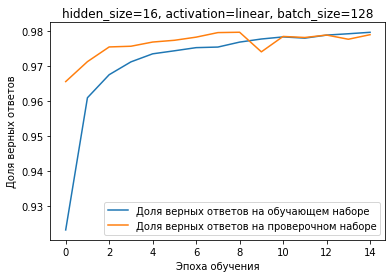

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=16
activation=linear
batch_size=10
hidden_size== 16 --> 16
Epoch 1/15
6000/6000 [==============================] - 34s 6ms/step - loss: 0.2194 - accuracy: 0.9344 - val_loss: 0.1101 - val_accuracy: 0.9657
Epoch 2/15
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1367 - accuracy: 0.9586 - val_loss: 0.1078 - val_accuracy: 0.9660
Epoch 3/15
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1175 - accuracy: 0.9634 - val_loss: 0.1017 - val_accuracy: 0.9692
Epoch 4/15
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1064 - accuracy: 0.9668 - val_loss: 0.0839 - val_accuracy: 0.9732
Epoch 5/15
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0987 - accuracy: 0.9694 - val_loss: 0.0859 - val_accuracy: 0.9732
Epoch 6/15
6000/6000 [==============================] - 34s 6ms/step 

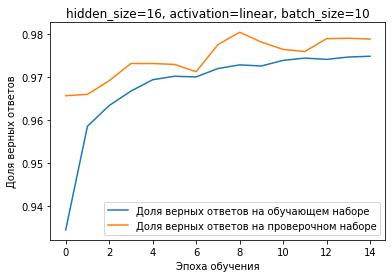

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=16
activation=linear
batch_size=100
hidden_size== 16 --> 16
Epoch 1/15
600/600 [==============================] - 5s 9ms/step - loss: 0.2132 - accuracy: 0.9348 - val_loss: 0.0968 - val_accuracy: 0.9689
Epoch 2/15
600/600 [==============================] - 5s 8ms/step - loss: 0.1089 - accuracy: 0.9667 - val_loss: 0.0876 - val_accuracy: 0.9720
Epoch 3/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0937 - accuracy: 0.9704 - val_loss: 0.0697 - val_accuracy: 0.9781
Epoch 4/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0853 - accuracy: 0.9730 - val_loss: 0.0747 - val_accuracy: 0.9759
Epoch 5/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0792 - accuracy: 0.9749 - val_loss: 0.0730 - val_accuracy: 0.9768
Epoch 6/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0740 - 

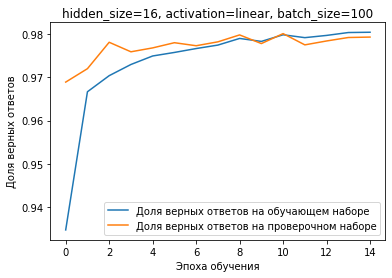

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=16
activation=linear
batch_size=48000
hidden_size== 16 --> 16
Epoch 1/15
2/2 [==============================] - 2s 1s/step - loss: 2.4550 - accuracy: 0.1728 - val_loss: 6.2501 - val_accuracy: 0.4111
Epoch 2/15
2/2 [==============================] - 1s 558ms/step - loss: 1.3803 - accuracy: 0.5702 - val_loss: 2.8930 - val_accuracy: 0.6185
Epoch 3/15
2/2 [==============================] - 1s 561ms/step - loss: 0.8821 - accuracy: 0.7013 - val_loss: 1.8916 - val_accuracy: 0.7212
Epoch 4/15
2/2 [==============================] - 1s 558ms/step - loss: 0.6304 - accuracy: 0.7919 - val_loss: 2.0366 - val_accuracy: 0.6995
Epoch 5/15
2/2 [==============================] - 1s 558ms/step - loss: 0.5576 - accuracy: 0.8234 - val_loss: 1.9685 - val_accuracy: 0.7072
Epoch 6/15
2/2 [==============================] - 1s 552ms/step - loss: 0.5163 - accuracy: 0.8

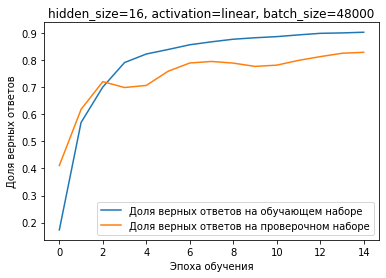

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=32
activation=relu
batch_size=128
hidden_size== 32 --> 32
Epoch 1/15
469/469 [==============================] - 6s 14ms/step - loss: 0.1662 - accuracy: 0.9492 - val_loss: 0.0410 - val_accuracy: 0.9867
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0346 - val_accuracy: 0.9885
Epoch 3/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 4/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 5/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 0.0383 - val_accuracy: 0.9888
Epoch 6/15
469/469 [==============================] - 6s 13ms/step - loss: 0.018

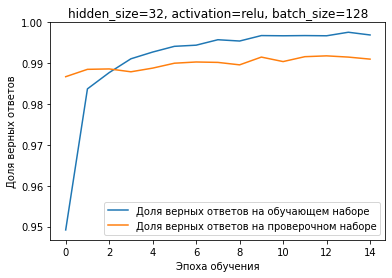

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=32
activation=relu
batch_size=10
hidden_size== 32 --> 32
Epoch 1/15
6000/6000 [==============================] - 36s 6ms/step - loss: 0.1223 - accuracy: 0.9632 - val_loss: 0.0457 - val_accuracy: 0.9853
Epoch 2/15
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0501 - val_accuracy: 0.9850
Epoch 3/15
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0391 - val_accuracy: 0.9877
Epoch 4/15
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0318 - val_accuracy: 0.9905
Epoch 5/15
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.0352 - val_accuracy: 0.9905
Epoch 6/15
6000/6000 [==============================] - 39s 6ms/step - 

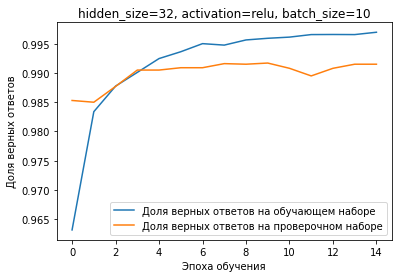

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=32
activation=relu
batch_size=100
hidden_size== 32 --> 32
Epoch 1/15
600/600 [==============================] - 7s 12ms/step - loss: 0.1526 - accuracy: 0.9526 - val_loss: 0.0370 - val_accuracy: 0.9882
Epoch 2/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0371 - val_accuracy: 0.9880
Epoch 3/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0360 - val_accuracy: 0.9885
Epoch 4/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0341 - val_accuracy: 0.9895
Epoch 5/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0261 - val_accuracy: 0.9923
Epoch 6/15
600/600 [==============================] - 7s 11ms/step - loss: 0.018

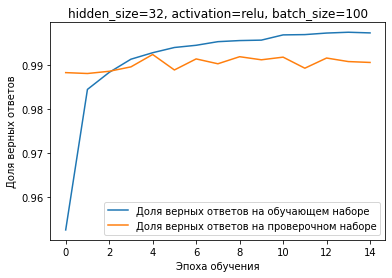

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=32
activation=relu
batch_size=48000
------------------------------
START
------------------------------
hidden_size=32
activation=linear
batch_size=128
hidden_size== 32 --> 32
Epoch 1/15
469/469 [==============================] - 6s 13ms/step - loss: 0.2044 - accuracy: 0.9386 - val_loss: 0.0859 - val_accuracy: 0.9736
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.1032 - accuracy: 0.9689 - val_loss: 0.0780 - val_accuracy: 0.9749
Epoch 3/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0860 - accuracy: 0.9736 - val_loss: 0.0778 - val_accuracy: 0.9757
Epoch 4/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0768 - accuracy: 0.9751 - val_loss: 0.0775 - val_accuracy: 0.9767
Epoch 5/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0693 - accuracy: 0.9778 - va

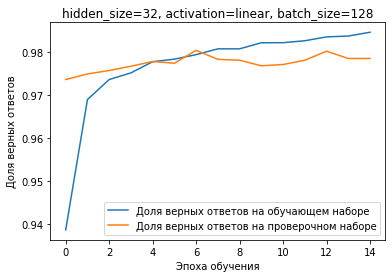

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=32
activation=linear
batch_size=10
hidden_size== 32 --> 32
Epoch 1/15
6000/6000 [==============================] - 35s 6ms/step - loss: 0.2095 - accuracy: 0.9374 - val_loss: 0.1106 - val_accuracy: 0.9683
Epoch 2/15
6000/6000 [==============================] - 38s 6ms/step - loss: 0.1282 - accuracy: 0.9612 - val_loss: 0.0914 - val_accuracy: 0.9720
Epoch 3/15
6000/6000 [==============================] - 38s 6ms/step - loss: 0.1126 - accuracy: 0.9649 - val_loss: 0.0949 - val_accuracy: 0.9713
Epoch 4/15
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0995 - accuracy: 0.9690 - val_loss: 0.1207 - val_accuracy: 0.9661
Epoch 5/15
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0958 - accuracy: 0.9709 - val_loss: 0.0856 - val_accuracy: 0.9744
Epoch 6/15
6000/6000 [==============================] - 37s 6ms/step 

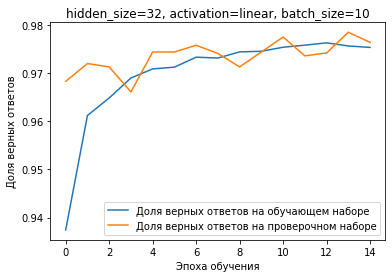

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=32
activation=linear
batch_size=100
hidden_size== 32 --> 32
Epoch 1/15
600/600 [==============================] - 7s 11ms/step - loss: 0.1995 - accuracy: 0.9402 - val_loss: 0.0989 - val_accuracy: 0.9677
Epoch 2/15
600/600 [==============================] - 7s 11ms/step - loss: 0.1007 - accuracy: 0.9687 - val_loss: 0.0734 - val_accuracy: 0.9759
Epoch 3/15
600/600 [==============================] - 6s 11ms/step - loss: 0.0849 - accuracy: 0.9730 - val_loss: 0.0728 - val_accuracy: 0.9764
Epoch 4/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0765 - accuracy: 0.9755 - val_loss: 0.0822 - val_accuracy: 0.9743
Epoch 5/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0728 - accuracy: 0.9770 - val_loss: 0.0728 - val_accuracy: 0.9778
Epoch 6/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0

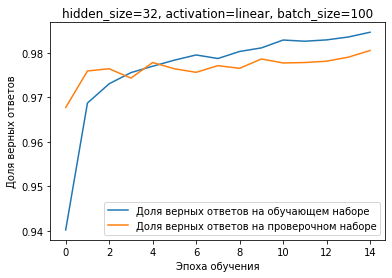

******************************
END
******************************

------------------------------
START
------------------------------
hidden_size=32
activation=linear
batch_size=48000
hidden_size_arr=[16, 16, 16, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32, 32]
activation_arr=['relu', 'relu', 'relu', 'relu', 'linear', 'linear', 'linear', 'linear', 'relu', 'relu', 'relu', 'linear', 'linear', 'linear']
batch_size_arr=[128, 10, 100, 48000, 128, 10, 100, 48000, 128, 10, 100, 128, 10, 100]
acc_arr=[0.9951666593551636, 0.9960166811943054, 0.9960166811943054, 0.8712999820709229, 0.9795833230018616, 0.9749000072479248, 0.9804166555404663, 0.9039333462715149, 0.996916651725769, 0.9969666600227356, 0.9971833229064941, 0.9846166372299194, 0.975350022315979, 0.9846000075340271]
val_acc_arr=[0.9908000230789185, 0.9901000261306763, 0.9908999800682068, 0.7851999998092651, 0.9789000153541565, 0.9789000153541565, 0.9793000221252441, 0.829800009727478, 0.9909999966621399, 0.9915000200271606, 0.9904999732971

In [ ]:
x_train, y_train, x_test, y_test = prepare_data()

hidden_sizes = [16, 32]
activations =['relu', 'linear']
batch_sizes = [128, 10, 100, 48000]

hidden_size_arr = []
activation_arr = []
batch_size_arr = []

acc_arr = []
val_acc_arr = []

for hidden_size in hidden_sizes:
  for activation in activations:
    for batch_size in batch_sizes:
      print('-'*30)
      print('START')
      print('-'*30)
      print(f'hidden_size={hidden_size}')
      print(f'activation={activation}')
      print(f'batch_size={batch_size}')

      if hidden_size == 32 and batch_size == 48000:
        break

      model = create_model_mnist_exp(hidden_size, activation)
      #print(model.summary())

      # Обучение сети
      history = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), verbose=1)

      # График точности обучения
      plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
      plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
      plt.xlabel('Эпоха обучения')
      plt.ylabel('Доля верных ответов')
      plt.legend()
      plt.title(f'hidden_size={hidden_size}, activation={activation}, batch_size={batch_size}')
      plt.show()
      
      #print(f'accuracy={history.history['accuracy'][-1]} на последней эпохе')
      #print(f'val_accuracy={history.history['val_accuracy'][-1]} на последней эпохе')

      acc_arr.append(history.history['accuracy'][-1]) # accuracy на последней эпохе
      val_acc_arr.append(history.history['val_accuracy'][-1]) # val_accuracy на последней эпохе
      hidden_size_arr.append(hidden_size)
      activation_arr.append(activation)
      batch_size_arr.append(batch_size)
      print('*'*30)
      print('END')
      print('*'*30)
      print()

print(f'hidden_size_arr={hidden_size_arr}')
print(f'activation_arr={activation_arr}')
print(f'batch_size_arr={batch_size_arr}')
print(f'acc_arr={acc_arr}')
print(f'val_acc_arr={val_acc_arr}')
print()
print(len(hidden_size_arr))
print(len(activation_arr))
print(len(batch_size_arr))
print(len(acc_arr))
print(len(val_acc_arr))



In [ ]:
df_dict = {'hidden_size':hidden_size_arr,
           'activation': activation_arr,
           'batch_size': batch_size_arr,
           'accuracy_last_epoch': acc_arr,
           'val_acc_last_epoch': val_acc_arr}
df = pd.DataFrame(df_dict)
df

,hidden_size,activation,batch_size,accuracy_last_epoch,val_acc_last_epoch
0,16,relu,128,0.995167,0.9908
1,16,relu,10,0.996017,0.9901
2,16,relu,100,0.996017,0.9909
3,16,relu,48000,0.871300,0.7852
4,16,linear,128,0.979583,0.9789
5,16,linear,10,0.974900,0.9789
6,16,linear,100,0.980417,0.9793
7,16,linear,48000,0.903933,0.8298
8,32,relu,128,0.996917,0.9910
9,32,relu,10,0.996967,0.9915


При hidden_size=32 и batch_size=48000 Вызывает ошибку типа Resource Exhausted Error. Исключил их из модели. При разбиении фильтров (2, 4, 16) на 3 слоя при сравнении с фильтрами (32, 32) на 2 слоя при batch_size=128, при activation=relu or linear точность примерно одинакова. В остальных случаях при batch_size=(10, 100) и activation=relu при hidden_size=(2, 4, 16) or (32, 32) точности примерно одиноковы. В случаях при batch_size=(10, 100) и activation=linear при hidden_size=(2, 4, 16) or (32, 32) точности ниже и примерно одиноковы между собой. При batch_size=48000, activation=relu or linear и hidden_size=(2, 4, 16) точность существенно ниже.
При больших batch_size скорость обучения высокая.